Alejandro José Alfaro García | A00842460
Tarea Análisis Exploratorio de Datos

# 0) Carga de Documento y librerías

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Cargar datos
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Primeras filas
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1)Variabilidad

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data colu

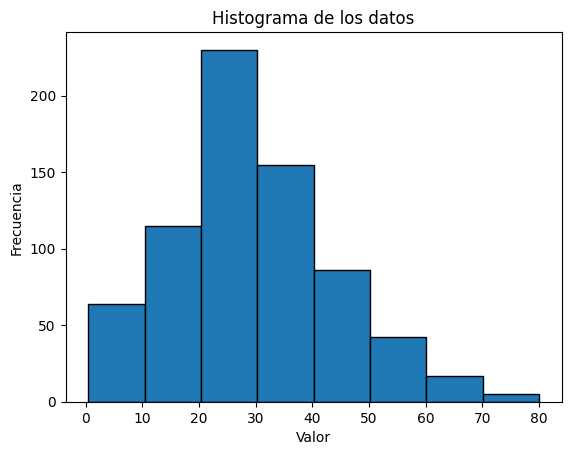

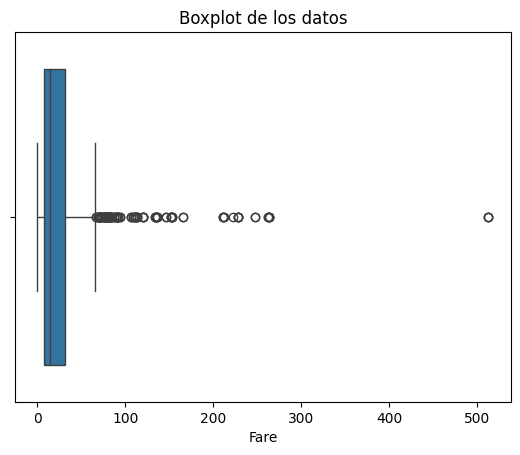

In [9]:
#info general
print(titanic.describe())
print(titanic.info())

#para saber sobre edad
plt.hist(titanic['Age'], bins=8, edgecolor='black')
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.title("Histograma de los datos")
plt.show()

# para saber sobre el pago
sns.boxplot(x=titanic['Fare'])
plt.title("Boxplot de los datos")
plt.show()




## Respuestas
Basandose en las gráficas generadas, es de notar que si bien hay pasajeros de cada uno de los grupos etarios, la gran mayoría si tenian entre 20 a 40 años. Hay aproximadamente 180 pasajeros menores de 20 años y aun mas pocos mayores de 40 años, por lo que si hay grupos etarios definidos.

Por la parte de las tarifas, si hay valores atipicos, los cuales se pueden ver en el boxplot que muestra los cuartiles de los datos, podemos ver tiquetes por 500,200,250 dolares, cuando el promedio esta en 32 dolares aproximadamente. Esto se puede deber a alguna tarifa especial, acceso a partes restringidas del barco o servicios más lujosos.

Finalmente, viendo el promedio de la variable survived, podemos ver que aproximadamente el 38% de los pasajeros de la embarcación sobrevivieron, lo cual se asemeja a la realidad, de donde 2200 pasajeros, solo sobrevivieron 720 (32%~)

# 2) Covariación

Mi primera pregunta que considero interesante analizar es la supervivencia de los pasajeros basandose en la edad pero comparandolo con las clases sociales, es decir, si los niños tuvieron mas oportunidad de sobrevivir basandose en su clase social. Esto se me hace particularmente curioso pues es una caracteristica totalmente ajena a ellos, e incluso se podría decir que subir al barco esta más alla de su decisión, pues muchos solo siguen las indicaciones de sus padres.


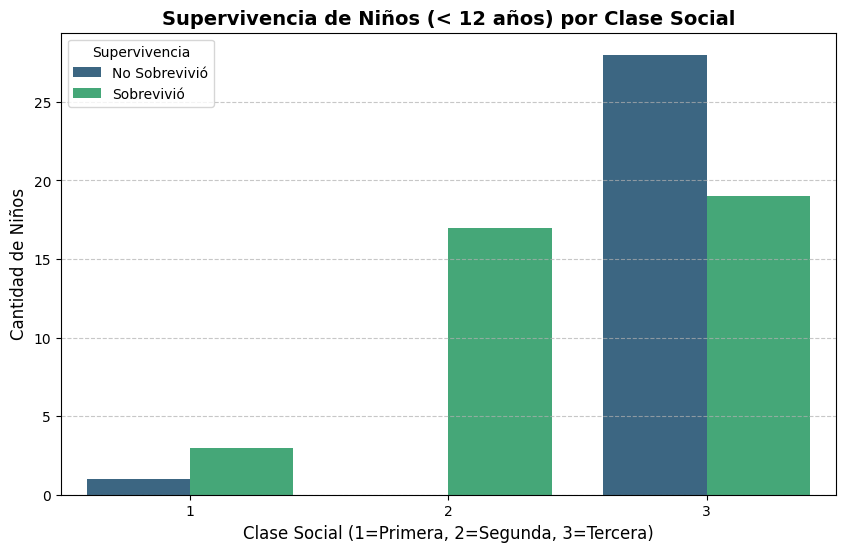

In [10]:
# Filtrar solo niños menores a 12 años
ninos = titanic[titanic['Age'] < 12].copy()

# Crear el gráfico de barras comparativo
plt.figure(figsize=(10, 6))
sns.countplot(data=ninos, x='Pclass', hue='Survived', palette='viridis')

# Personalización
plt.title('Supervivencia de Niños (< 12 años) por Clase Social', fontsize=14, fontweight='bold')
plt.xlabel('Clase Social (1=Primera, 2=Segunda, 3=Tercera)', fontsize=12)
plt.ylabel('Cantidad de Niños', fontsize=12)
plt.legend(title='Supervivencia', labels=['No Sobrevivió', 'Sobrevivió'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

De aqui, me doy cuenta que cometi un error, puesto que esta gráfica no me da información sobre la proporción de sobrevivientes y fallecidos por clase social, por lo que haré otra versión del gráfico.

/tmp/ipython-input-2085625655.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasa_supervivencia_ninos.index, y=tasa_supervivencia_ninos.values, palette='viridis')


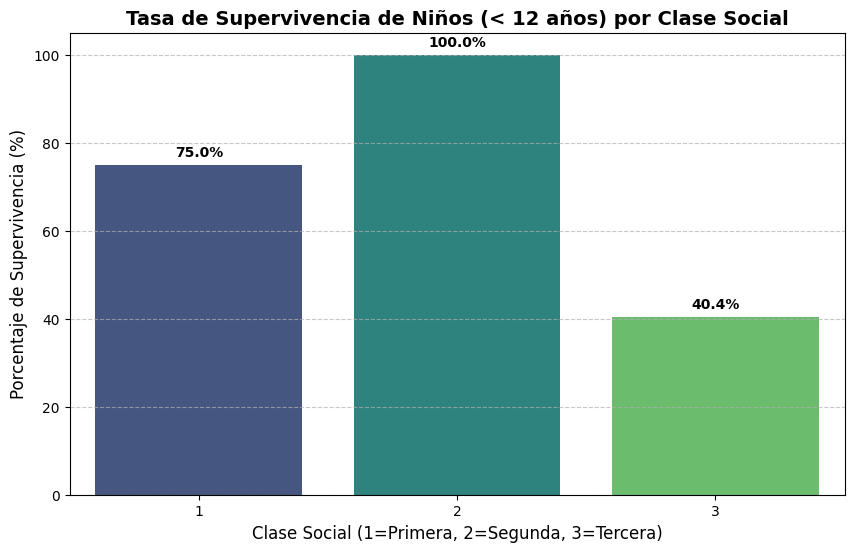

In [12]:

ninos = titanic[titanic['Age'] < 12].copy()
tasa_supervivencia_ninos = ninos.groupby('Pclass')['Survived'].mean() * 100


plt.figure(figsize=(10, 6))
sns.barplot(x=tasa_supervivencia_ninos.index, y=tasa_supervivencia_ninos.values, palette='viridis')


plt.title('Tasa de Supervivencia de Niños (< 12 años) por Clase Social', fontsize=14, fontweight='bold')
plt.xlabel('Clase Social (1=Primera, 2=Segunda, 3=Tercera)', fontsize=12)
plt.ylabel('Porcentaje de Supervivencia (%)', fontsize=12)
plt.ylim(0, 105)

for i, v in enumerate(tasa_supervivencia_ninos.values):
    plt.text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Con esta información es sorprendente ver que la segunda clase fue la que más probabilidad tuvo de sobrevivir, contrario a la hipotesis previa que era que la primera clase iba a tener más prioridad. Incluso asi, considero que esta conclusión hay que tratarla con pinzas, puesto que al ser tan pocas personas en la muestra, es facil que otros factores (como por ejemplo, que alguien de primera clase tuviera alguna limitación motriz o enfermedad previa) afecten significativamente estos resultados. La conclusión menos confusa, es que los niños de tercera clase, incluso en su condición de vulnerabilidad adicional, fueron menos probables de sobrevivir en el accidente del titanic, demostrando el poder que tiene el dinero incluso sobrepasando al sentido de la moral sobre proteger a los niños.

## Segunda pregunta
Considero interesante averiguar cual fue el grupo etario (y genero de paso) que mayor porbabilidad tuvo de sobrevivir al accidente. Mi hipotesis inicial es que fueron las niñas de 0 a 12 años, puesto que tienen doble "prioridad" por asi decirlo, pero tambien es posible que ellas tuvieran que estar acompañadas de madres (o padres) por cuestiones de familia.

/tmp/ipython-input-1364710209.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_gender_age = titanic_copy.groupby(['age_range', 'Sex'])['Survived'].mean() * 100


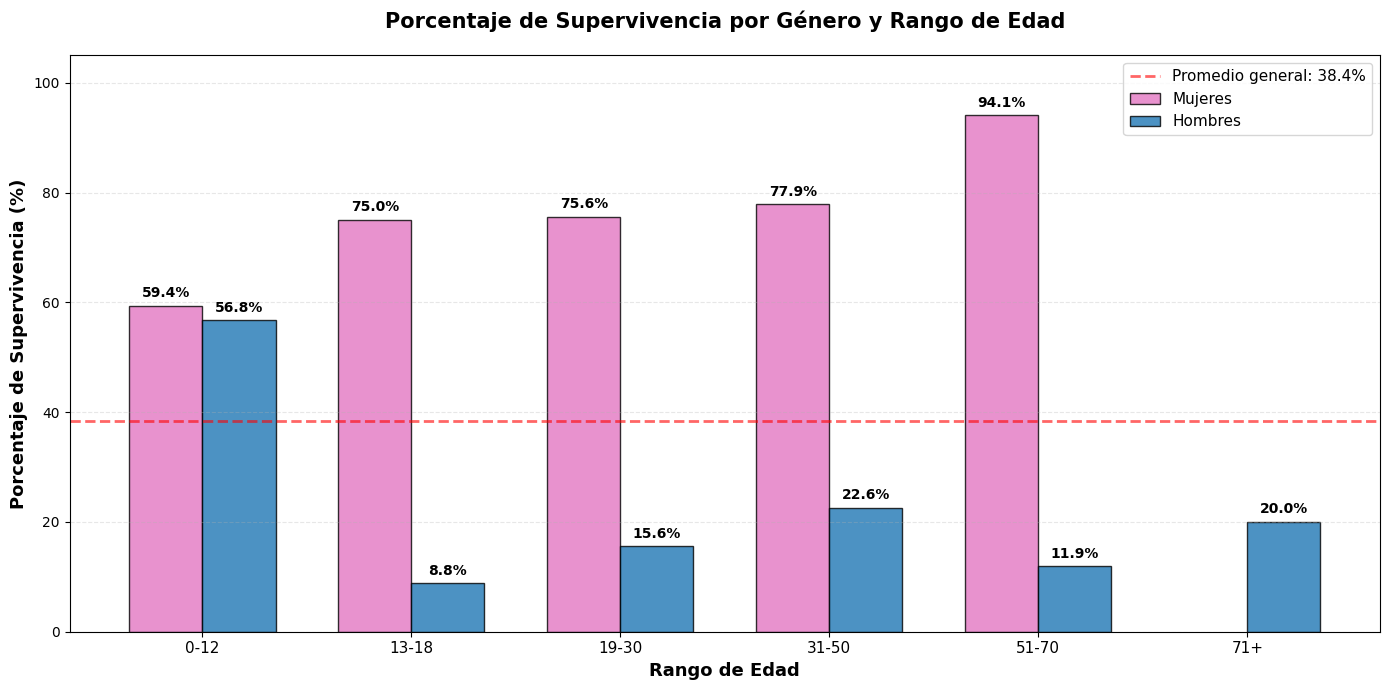


Tabla de Porcentajes de Supervivencia:
Sex        female  male
age_range              
0-12         59.4  56.8
13-18        75.0   8.8
19-30        75.6  15.6
31-50        77.9  22.6
51-70        94.1  11.9
71+           NaN  20.0


In [18]:
# Crear una copia para no modificar el dataset original
titanic_copy = titanic.dropna(subset=['Age']).copy()
titanic_copy['age_range'] = pd.cut(titanic_copy['Age'],
                                   bins=[0, 12, 18, 30, 50, 70, 100],
                                   labels=['0-12', '13-18', '19-30', '31-50', '51-70', '71+'])

# Calcular porcentaje de supervivencia por género y rango de edad
survival_by_gender_age = titanic_copy.groupby(['age_range', 'Sex'])['Survived'].mean() * 100
survival_df = survival_by_gender_age.unstack()

# Crear la gráfica
plt.figure(figsize=(14, 7))

# Posiciones de las barras
x = range(len(survival_df.index))
width = 0.35

# Crear barras agrupadas
bars1 = plt.bar([i - width/2 for i in x], survival_df['female'], width,
               label='Mujeres', color='#e377c2', edgecolor='black', alpha=0.8)
bars2 = plt.bar([i + width/2 for i in x], survival_df['male'], width,
               label='Hombres', color='#1f77b4', edgecolor='black', alpha=0.8)

# Añadir valores sobre las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}%',
                ha='center', va='bottom', fontweight='bold', fontsize=10)

# Configuración de la gráfica
plt.xlabel('Rango de Edad', fontsize=13, fontweight='bold')
plt.ylabel('Porcentaje de Supervivencia (%)', fontsize=13, fontweight='bold')
plt.title('Porcentaje de Supervivencia por Género y Rango de Edad',
         fontsize=15, fontweight='bold', pad=20)
plt.xticks(x, survival_df.index, fontsize=11)
plt.ylim(0, 105)
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, alpha=0.3, axis='y', linestyle='--')

# Añadir línea de referencia del promedio general
avg_survival = titanic['Survived'].mean() * 100
plt.axhline(y=avg_survival, color='red', linestyle='--', linewidth=2,
           alpha=0.6, label=f'Promedio general: {avg_survival:.1f}%')
plt.legend(fontsize=11, loc='upper right')

plt.tight_layout()
plt.show()

# Mostrar tabla de datos
print("\nTabla de Porcentajes de Supervivencia:")
print("="*60)
print(survival_df.round(1))

Aqui causa mucha curiosidad un hecho: las mujeres tuvieron mejor chance de sobrevivir que los niños (e niñas), esto esta bastante curioso pues es contraintuitivo. Lo otro que es bastante curioso es que el grupo que menos sobrevivió fueron niños hombres, los cuales siguen siendo menores de edad. Quiero pensar que esto tiene que ver con el poder del dinero y la influencia por parte de los grupos de hombres mayores, lo cual trae serias implicaciones morales, pues se supone que los menores de edad son un grupo protegido. Definitivamente, si se huberan seguido las reglas al pie de la letra, los resultados hubieran sido muy diferentes. Claro esta, nadie estaba preparado para esta situación, por lo que es dificil que todo tomara lugar exactamente como debería, pero es imposible desviar la mirada de estas desigualdades que ponen el dinero o clase social por encima de los niños.

## Tercera pregunta
Para mi tercera pregunta, quisiera saber como es que se relaciona la supervivencia de los hombres en relación a la clase social. Como ya hemos podido ver, el grupo menos favorecido fueron los hombres, sin embargo, hay que ver la diferencia entre clases sociales para determinar cual fue el efecto del dinero entre los más afectados.

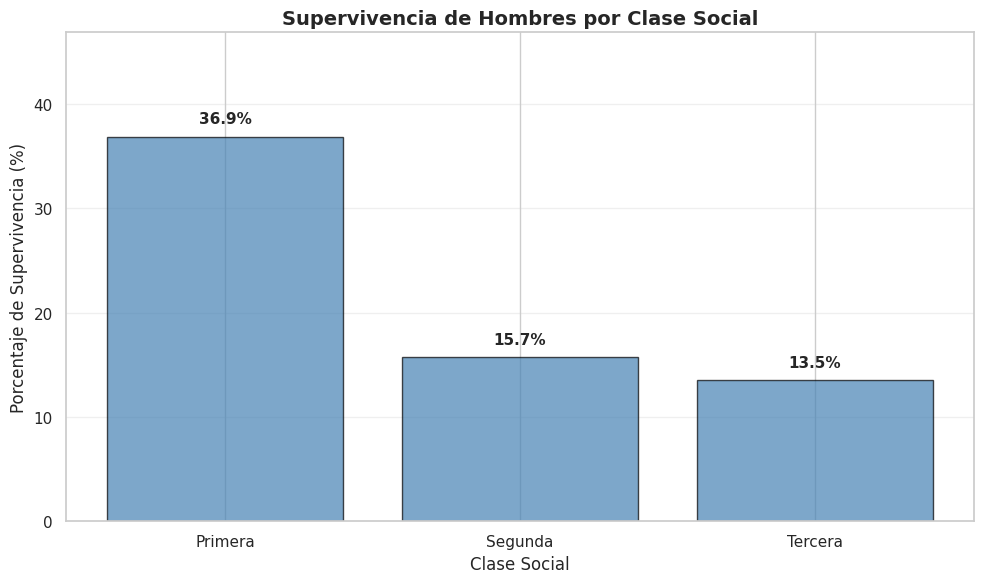

In [22]:
# Filtrar solo hombres
hombres = titanic[titanic['Sex'] == 'male']

# Calcular porcentaje de supervivencia por clase
survival_by_class = hombres.groupby('Pclass')['Survived'].mean() * 100

# Crear la gráfica
plt.figure(figsize=(10, 6))

# Crear barras
classes = ['Primera', 'Segunda', 'Tercera']
bars = plt.bar(classes, survival_by_class.values, color='steelblue',
               edgecolor='black', alpha=0.7)

# Añadir valores sobre las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}%',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

# Configuración
plt.xlabel('Clase Social', fontsize=12)
plt.ylabel('Porcentaje de Supervivencia (%)', fontsize=12)
plt.title('Supervivencia de Hombres por Clase Social', fontsize=14, fontweight='bold')
plt.ylim(0, max(survival_by_class.values) + 10)
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

Ahora, con este gráfico es posible evidenciar la gran desigualdad que existió entre hombres por clase social, donde incluso siendo la categoría menos favorecida, los hombres de primera clase duplicaron su posibilidad de sobrevivir solo por su dinero o estatus social.Con estainformación, es posible intentar adentrarnos a la realidad del titanic, sobrevivia quien tenia los mejores contactos, o quien pareciera mas vulnerable, quien era visto como fuerte, como resistente, era una condena de muerte dentro del titanic.

/tmp/ipython-input-1230199120.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasa_genero.index, y=tasa_genero.values, palette='magma')


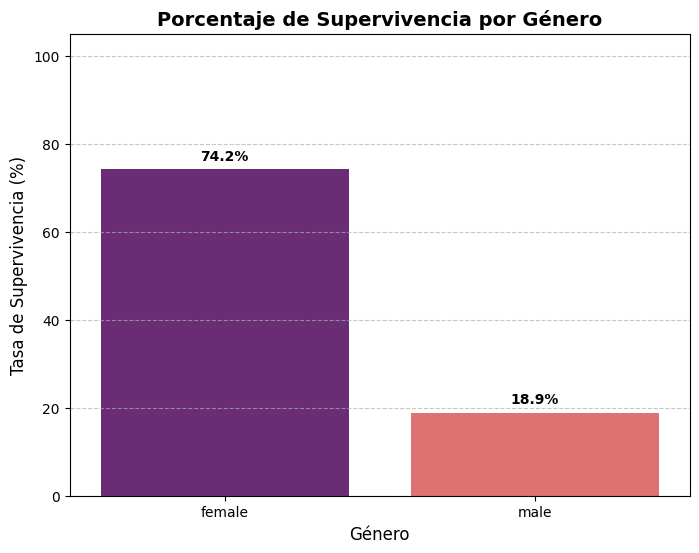

In [14]:
# Calcular tasa de supervivencia por género
tasa_genero = titanic.groupby('Sex')['Survived'].mean() * 100

# Crear el gráfico
plt.figure(figsize=(8, 6))
sns.barplot(x=tasa_genero.index, y=tasa_genero.values, palette='magma')

# Personalización
plt.title('Porcentaje de Supervivencia por Género', fontsize=14, fontweight='bold')
plt.xlabel('Género', fontsize=12)
plt.ylabel('Tasa de Supervivencia (%)', fontsize=12)
plt.ylim(0, 105)

# Etiquetas de datos
for i, v in enumerate(tasa_genero.values):
    plt.text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3) Datos faltantes


Resumen de Valores Faltantes por Variable:
          Total Faltantes  Porcentaje (%)
Cabin                 687       77.104377
Age                   177       19.865320
AgeGroup              177       19.865320
Embarked                2        0.224467


/tmp/ipython-input-2570091168.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_missing.index, y=top_missing['Total Faltantes'], palette='viridis')


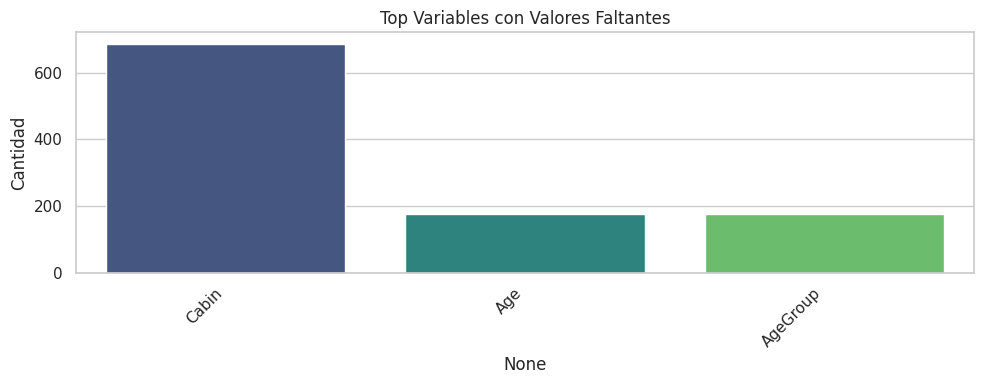


Valores faltantes por Clase Social (Pclass):
        Edad_Faltante  Cabina_Faltante  Total_Pasajeros  %_Edad_Faltante  \
Pclass                                                                     
1                  30               40              216        13.888889   
2                  11              168              184         5.978261   
3                 136              479              491        27.698574   

        %_Cabina_Faltante  
Pclass                     
1               18.518519  
2               91.304348  
3               97.556008  


<Figure size 1000x500 with 0 Axes>

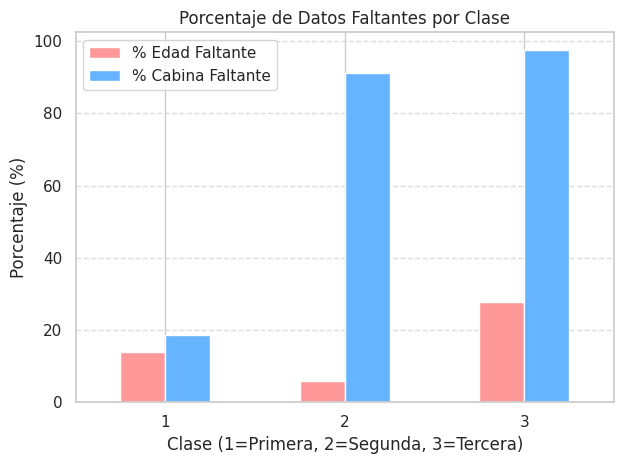

In [30]:

# Calcular valores faltantes
missing_values = titanic.isnull().sum()
missing_pct = (titanic.isnull().sum() / len(titanic)) * 100

missing_df = pd.DataFrame({
    'Total Faltantes': missing_values,
    'Porcentaje (%)': missing_pct
}).sort_values('Total Faltantes', ascending=False)

print("Resumen de Valores Faltantes por Variable:")
print(missing_df[missing_df['Total Faltantes'] > 0])  # Cambié display() por print()

# Gráfica de barras
plt.figure(figsize=(10, 4))
top_missing = missing_df[missing_df['Total Faltantes'] > 0].head(3)  # Solo las que tienen faltantes
sns.barplot(x=top_missing.index, y=top_missing['Total Faltantes'], palette='viridis')
plt.title('Top Variables con Valores Faltantes')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor lectura
plt.tight_layout()
plt.show()

print("\nValores faltantes por Clase Social (Pclass):")

# Calculamos edad y cabina faltante por clase
class_missing = titanic.groupby('Pclass').agg({
    'Age': lambda x: x.isnull().sum(),
    'Cabin': lambda x: x.isnull().sum(),
    'Survived': 'count'
}).rename(columns={'Survived': 'Total_Pasajeros', 'Age': 'Edad_Faltante', 'Cabin': 'Cabina_Faltante'})

# Porcentajes
class_missing['%_Edad_Faltante'] = (class_missing['Edad_Faltante'] / class_missing['Total_Pasajeros']) * 100
class_missing['%_Cabina_Faltante'] = (class_missing['Cabina_Faltante'] / class_missing['Total_Pasajeros']) * 100

print(class_missing)  # Cambié display() por print()

# Visualización
plt.figure(figsize=(10, 5))  # Agregué plt.figure()
class_missing[['%_Edad_Faltante', '%_Cabina_Faltante']].plot(kind='bar', color=['#ff9999','#66b3ff'])
plt.title('Porcentaje de Datos Faltantes por Clase')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Clase (1=Primera, 2=Segunda, 3=Tercera)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(['% Edad Faltante', '% Cabina Faltante'])  # Agregué leyenda
plt.tight_layout()
plt.show()

Con esto en mente, podemos ver que gran parte de la información que falta es de la tercera clase, lo cual tiene sentido considerando que fue la clase que menor tasa de supervivencia tuvo dentro en el titanic. No obstante, es curioso como no hay una semejanza entre los datos que faltan por categoría, es decir, quienes cuentan la historia de quienes fallecieron (quienes lo más probable son familiares de las victimas) sabian su edad, pero no el numero de cabina en el que estaban. Otra posibilidad es que este numero elevado de datos faltantes de la cabina no sea de las vicitmas que murieron, sino de los mismos supervivientes que no se acuerdan en medio de todo el caos y confusión, lo más probable es que sea una combinación de los dos.

# 4 Pregunta original
Como mi pregunta original, quiero saber sobre las prioridades de la tripulación y del barco basandose en el precio del tiquete, a saber, aunque hay clases, quiero saber si las diferencias en los tiquetes implicaron una diferencia en la posibilidad de sobrevivir en el titanic o si por el contrario, la clase es suficiente indicador para determinar este factor para la supervivencia.

/tmp/ipython-input-305203312.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data_boxplot, labels=labels_boxplot, patch_artist=True,


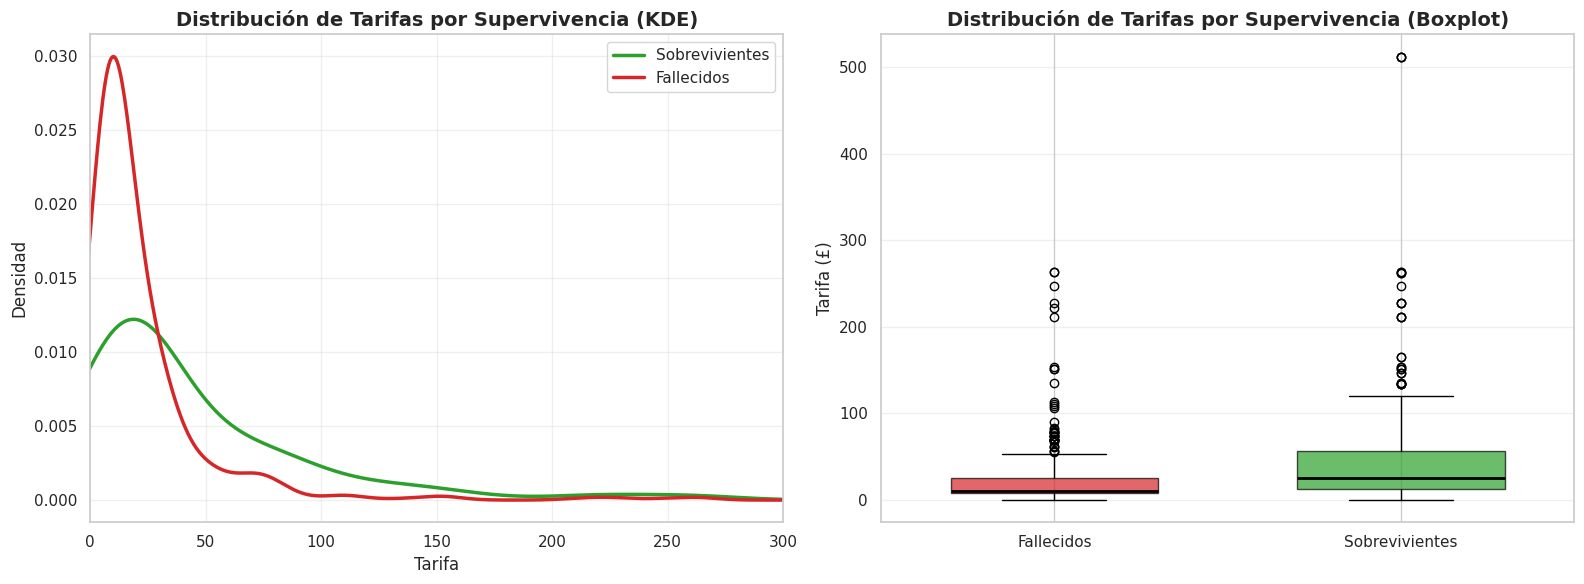


ESTADÍSTICAS DESCRIPTIVAS DE TARIFAS POR SUPERVIVENCIA

FALLECIDOS:
  - Media: £22.12
  - Mediana: £10.50
  - Desviación estándar: £31.39
  - Mínimo: £0.00
  - Máximo: £263.00
  - Q1 (25%): £7.85
  - Q3 (75%): £26.00

SOBREVIVIENTES:
  - Media: £48.40
  - Mediana: £26.00
  - Desviación estándar: £66.60
  - Mínimo: £0.00
  - Máximo: £512.33
  - Q1 (25%): £12.47
  - Q3 (75%): £57.00

DIFERENCIA:
  - Diferencia en media: £26.28
  - Diferencia en mediana: £15.50


In [24]:
# Crear figura con dos gráficas lado a lado
plt.figure(figsize=(16, 6))

# GRÁFICA 1: KDE (Density Plot)
plt.subplot(1, 2, 1)

# Separar datos por supervivencia
survived_fare = titanic[titanic['Survived'] == 1]['Fare']
died_fare = titanic[titanic['Survived'] == 0]['Fare']

# Crear KDE plots
survived_fare.plot(kind='kde', color='#2ca02c', linewidth=2.5, label='Sobrevivientes')
died_fare.plot(kind='kde', color='#d62728', linewidth=2.5, label='Fallecidos')

plt.xlabel('Tarifa', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.title('Distribución de Tarifas por Supervivencia (KDE)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim(0, 300)  # Limitar para mejor visualización

# GRÁFICA 2: Boxplot
plt.subplot(1, 2, 2)

# Preparar datos para boxplot
data_boxplot = [died_fare, survived_fare]
labels_boxplot = ['Fallecidos', 'Sobrevivientes']
colors_boxplot = ['#d62728', '#2ca02c']

bp = plt.boxplot(data_boxplot, labels=labels_boxplot, patch_artist=True,
                 medianprops=dict(color='black', linewidth=2),
                 widths=0.6)

# Colorear las cajas
for patch, color in zip(bp['boxes'], colors_boxplot):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.ylabel('Tarifa (£)', fontsize=12)
plt.title('Distribución de Tarifas por Supervivencia (Boxplot)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# ESTADÍSTICAS DESCRIPTIVAS
print("\n" + "="*70)
print("ESTADÍSTICAS DESCRIPTIVAS DE TARIFAS POR SUPERVIVENCIA")
print("="*70)

print("\nFALLECIDOS:")
print(f"  - Media: £{died_fare.mean():.2f}")
print(f"  - Mediana: £{died_fare.median():.2f}")
print(f"  - Desviación estándar: £{died_fare.std():.2f}")
print(f"  - Mínimo: £{died_fare.min():.2f}")
print(f"  - Máximo: £{died_fare.max():.2f}")
print(f"  - Q1 (25%): £{died_fare.quantile(0.25):.2f}")
print(f"  - Q3 (75%): £{died_fare.quantile(0.75):.2f}")

print("\nSOBREVIVIENTES:")
print(f"  - Media: £{survived_fare.mean():.2f}")
print(f"  - Mediana: £{survived_fare.median():.2f}")
print(f"  - Desviación estándar: £{survived_fare.std():.2f}")
print(f"  - Mínimo: £{survived_fare.min():.2f}")
print(f"  - Máximo: £{survived_fare.max():.2f}")
print(f"  - Q1 (25%): £{survived_fare.quantile(0.25):.2f}")
print(f"  - Q3 (75%): £{survived_fare.quantile(0.75):.2f}")

print("\nDIFERENCIA:")
print(f"  - Diferencia en media: £{survived_fare.mean() - died_fare.mean():.2f}")
print(f"  - Diferencia en mediana: £{survived_fare.median() - died_fare.median():.2f}")
print("="*70)

Gracias a información como la desviación estandar o la media, podemos ver que los precios de quienes sobrevivieron fueron muy variados, pero en general, quienes sobrevivieron más, fueron los que pagaron un promedio de 48.40 libras, en otras palabras, pagar más por tu tiquete era entrar "de gane" en la ruleta de supervivencia del titanic. Estas 26.28 libras que fueron en realidad la diferencia de la media fueron la diferencia entre la vida y la muerte para muchos en ese barco.

A manera de reflexión, considero que esta actividad fue importante para darse cuenta del poder que tiene el EDA al momento de ver una base de datos o dataframe. Sin modelos complejos, se pueden hacer hipotesis interesantes al tiempo que se familiariza con el conjunto de datos, gracias a estos resumenes, gráficas o pequeños calculos, es posible ver tendencias, patrones, sin confirmar pero detectandolos en "nuestro radar". Considero que lo más dificil ha sido acostumbrarse a todas las nuevas herramientas y los cambios o pivotes tan rapidos entre ellas, hace nada estabamos viendo terminar y ahora python, pero tambien debemos saber como hacerlo en R o explorar otras cosas en MATLAB. Entender y ganar pericia al momento de analizar para saber que es lo que puedo hacer y cual es la mejor herramienta para esto es lo más fundamental para mí (pero también lo más dificil, en este caso)